In [53]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# 准备数据集
train_data = torchvision.datasets.CIFAR10(root='C:/Users/18601/Desktop/data', train=True, transform=torchvision.transforms.ToTensor(),
                                          download=True)
test_data = torchvision.datasets.CIFAR10(root='C:/Users/18601/Desktop/data', train=False, transform=torchvision.transforms.ToTensor(),
                                         download=True)


print("训练集的长度:{}".format(len(train_data)))
print("测试集的长度:{}".format(len(test_data)))

Files already downloaded and verified
Files already downloaded and verified
训练集的长度:50000
测试集的长度:10000


In [55]:
# DataLoader加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [56]:
# 搭建神经网络
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 7, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 7, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 7, 1, 2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64*2*2, 64),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        x = self.model(x)
        
        return x


In [57]:
# 创建网络模型
model = Model().cuda()

#添加tensorboard可视化数据
writer = SummaryWriter('../logs_tensorboard')

# 损失函数
loss = nn.CrossEntropyLoss().cuda()

# 优化器
optimizer  = torch.optim.SGD(model.parameters(),lr=0.01,)

i = 1 # 用于绘制测试集的tensorboard

In [59]:
import os
Loss=[]
Train=[]
Test=[]
# 开始循环训练
for epoch in range(30):
    LOSS=0
    accurate = 0
    num_time = 0 # 记录看看每轮有多少次训练
    # print('开始第{}轮训练'.format(epoch+1))
    model.train() # 也可以不写，规范的话是写，用来表明训练步骤
    for data in train_dataloader:
        # 数据分开 一个是图片数据，一个是真实值
        imgs,targets = data
        imgs = imgs.cuda()
        targets = targets.cuda()
        # 拿到预测值
        output = model(imgs)
        # 计算损失值
        loss_in = loss(output,targets)
        # 优化开始~ ~ 先梯度清零
        optimizer.zero_grad()
        # 反向传播+更新
        loss_in.backward()
        optimizer.step()
        num_time +=1
        LOSS+=loss_in
        accurate += (output.argmax(1) == targets).sum()
        
        # if num_time % 100 == 0:
        #     writer.add_scalar('看一下训练集损失值',loss_in.item(),num_time)

    Train.append(accurate/len(train_data)*100)
    Loss.append(LOSS)
    sum_loss = 0 # 记录总体损失值

    # 每轮训练完成跑一下测试数据看看情况
    accurate = 0
    model.eval() # 也可以不写，规范的话就写，用来表明是测试步骤
    with torch.no_grad():
        for data in test_dataloader:
            # 这里的每一次循环 都是一个minibatch  一次for循环里面有64个数据。
            imgs , targets = data
            imgs = imgs.cuda()
            targets = targets.cuda()
            output = model(imgs)
            loss_in = loss(output,targets)

            sum_loss += loss_in
            #print('这里是output',output)
            accurate += (output.argmax(1) == targets).sum()
    Test.append(accurate/len(test_data)*100)
    
    # print('第{}轮测试集的正确率:{:.2f}%'.format(epoch+1,accurate/len(test_data)*100))

    # writer.add_scalar('看一下测试集损失',sum_loss,i)
    # writer.add_scalar('看一下当前测试集正确率',accurate/len(test_data)*100,i)
    i +=1

    # torch.save(model,'../HaoCheng_Chu/data/MNIST/raw{}.pth'.format(epoch+1))
    # print("第{}轮模型训练数据已保存".format(epoch+1))

# writer.close()


torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 3

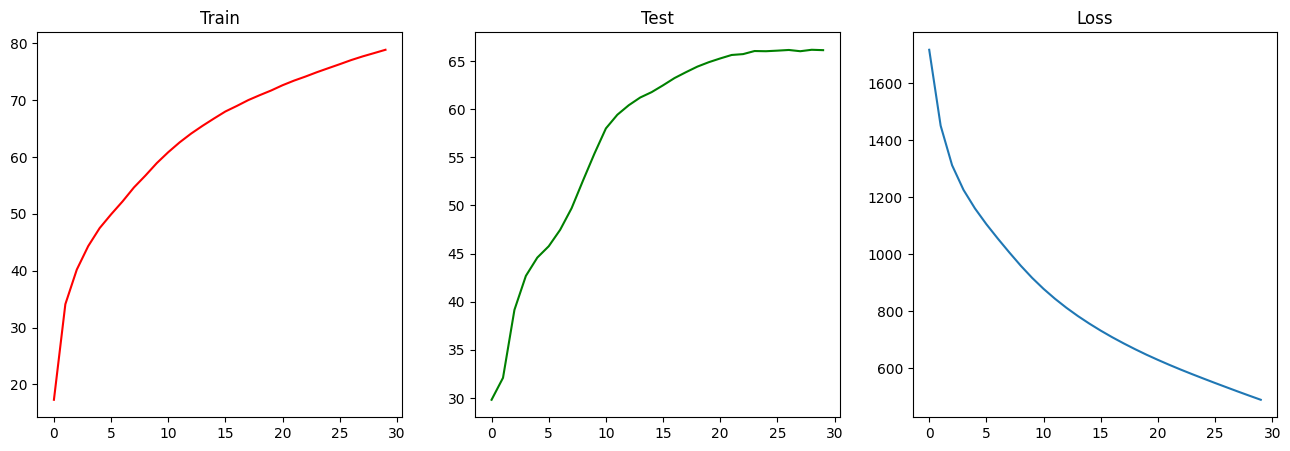

In [ ]:
Train=torch.tensor(Train)
Test=torch.tensor(Test)
Loss=torch.tensor(Loss)
Train=np.array(Train)
Test=np.array(Test)
Loss=np.array(Loss)
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.title("Train")
plt.plot([i for i in range(len(Train))], np.array(Train), "red")

plt.subplot(132)
plt.title("Test")
plt.plot([i for i in range(len(Test))],np.array(Test),"green")

plt.subplot(133)
plt.title("Loss")
plt.plot([i for i in range(len(Loss))],np.array(Loss))
plt.show()